## Importación de librerias necesarias:

In [1]:
# --------- General Data Science Libraries ------
import pandas as pd
import numpy as np
# --------- Visualization Libraries ---------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# # --------- Machine Learning Libraries ---------
# from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from yellowbrick.classifier import ConfusionMatrix
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import mutual_info_classif as mu_clsf
# from sklearn.model_selection import cross_val_score

## OBTENEMOS LOS DATOS:

In [2]:
#Importación de dataset desde github
url = 'https://raw.githubusercontent.com/Marianod2003/Proyectogrupo21/main/estimaciones-agricolas-2020-08.csv'

## A partir del archivo csv se crea el data frame df_agricola para trabajar con los datos

In [3]:
df_agricola = pd.read_csv(url)
df_agricola

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campa�a,campa�a,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,854,25 de Mayo,1,Ajo,2,1970/1971,1,1,3,3000
2,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467
3,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/1971,10,10,55,5500
4,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/1972,8,8,44,5500
...,...,...,...,...,...,...,...,...,...,...,...,...
143625,54,Misiones,112,San Pedro,31,Yerba mate,46,2014/2015,7975,7905,43478,5500
143626,54,Misiones,112,San Pedro,31,Yerba mate,47,2015/2016,7975,7905,46640,5900
143627,54,Misiones,112,San Pedro,31,Yerba mate,48,2016/2017,8200,8200,33620,4100
143628,54,Misiones,112,San Pedro,31,Yerba mate,49,2017/2018,8787,8787,43054,4900


## Obtenemos cantidad de filas

In [4]:
df_agricola.shape[0]

143630

## Cinco primeras filas

In [5]:
df_agricola.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campa�a,campa�a,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,854,25 de Mayo,1,Ajo,2,1970/1971,1,1,3,3000
2,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467
3,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/1971,10,10,55,5500
4,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/1972,8,8,44,5500


## Cinco ultimas filas

In [6]:
df_agricola.tail()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campa�a,campa�a,sup_sembrada,sup_cosechada,produccion,rendimiento
143625,54,Misiones,112,San Pedro,31,Yerba mate,46,2014/2015,7975,7905,43478,5500
143626,54,Misiones,112,San Pedro,31,Yerba mate,47,2015/2016,7975,7905,46640,5900
143627,54,Misiones,112,San Pedro,31,Yerba mate,48,2016/2017,8200,8200,33620,4100
143628,54,Misiones,112,San Pedro,31,Yerba mate,49,2017/2018,8787,8787,43054,4900
143629,54,Misiones,112,San Pedro,31,Yerba mate,50,2018/2019,9236,9236,46180,5000


## DEPURAMOS LOS DATOS:

## Cambiamos el nombre a ciertas columnas, eliminando espacios y caracteres especiales para que sean mas facil de escribir y manejar:

In [7]:
# Cambiar el nombre de tres columnas
df_agricola.rename(columns={'id_campa�a': 'id_campania', 'campa�a': 'campania', 'produccion ': 'produccion'}, inplace=True)


## Verificamos que no haya duplicados

In [8]:

# Verifica si hay filas duplicadas
duplicados = df_agricola[df_agricola.duplicated()]

if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)


No hay filas duplicadas en el DataFrame.


## Verificamos que no haya vacios

In [9]:

# Verifica si hay valores vacíos en todo el DataFrame
hay_vacios = df_agricola.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")


El DataFrame no contiene valores vacíos.


## EXPLORAMOS LOS DATOS:

## Obtenemos estadísticas descriptivas sobre las columnas numéricas del conjunto de datos:

In [10]:
df_agricola.describe()

,id_provincia,id_departamento,id_cultivo,id_campania,sup_sembrada,sup_cosechada,produccion,rendimiento
count,143630.000000,143630.000000,143630.000000,143630.000000,1.436300e+05,1.436300e+05,1.436300e+05,143630.000000
mean,34.087029,190.445471,19.295899,22.188596,1.162731e+04,1.013002e+04,3.110532e+04,3533.567235
std,29.300535,228.202917,10.161226,14.897955,3.462306e+04,3.318605e+04,1.228428e+05,5746.583592
min,6.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.000000,49.000000,11.000000,9.000000,1.500000e+02,5.000000e+01,1.600000e+02,1000.000000
50%,22.000000,98.000000,21.000000,19.000000,1.250000e+03,7.000000e+02,1.600000e+03,1892.000000
75%,54.000000,189.000000,28.000000,35.000000,8.000000e+03,5.500000e+03,1.261675e+04,3512.000000
max,94.000000,882.000000,35.000000,51.000000,1.096100e+06,1.066100e+06,8.620000e+06,300000.000000


## Información general del DataFrame: se obtiene la información general, como el número de filas y columnas, los tipos de datos y si hay valores nulos:

In [11]:
df_agricola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143630 entries, 0 to 143629
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_provincia     143630 non-null  int64 
 1   provincia        143630 non-null  object
 2   id_departamento  143630 non-null  int64 
 3   departamento     143630 non-null  object
 4   id_cultivo       143630 non-null  int64 
 5   cultivo          143630 non-null  object
 6   id_campania      143630 non-null  int64 
 7   campania         143630 non-null  object
 8   sup_sembrada     143630 non-null  int64 
 9   sup_cosechada    143630 non-null  int64 
 10  produccion       143630 non-null  int64 
 11  rendimiento      143630 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 13.1+ MB


### La informacion general indica que los datos en la columna "campania" son tipo "object", lo que significa que son un cadena de texto u otro tipo no numerico, sin embargo la columna nos muestra dos años separados por el caracter '/'. Si queremos hacer calculos por fechas debemos corregir eso.

## Dividimos la columna campaña en dos columnas y las convertimos a datetime para poder trabajar con fechas:

In [12]:
df_agricola[['inicio_campania', 'fin_campania']] = df_agricola['campania'].str.split('/', expand=True)
df_agricola['inicio_campania'] = pd.to_datetime(df_agricola['inicio_campania'], format='%Y')
df_agricola['fin_campania'] = pd.to_datetime(df_agricola['fin_campania'], format='%Y') + pd.DateOffset(years=1)

# Extrae el año de las columnas "inicio_campaña" y "fin_campaña"
df_agricola['inicio_campania'] = df_agricola['inicio_campania'].dt.year
df_agricola['fin_campania'] = df_agricola['fin_campania'].dt.year


## LUEGO DE HABER OBTENIDO LOS DATOS, DEPURARLOS y EXPLORARLOS

## Ejecutamos df_agricola para ver como quedó el conjunto de datos con las correciones en los nombres de las columnas y el agregado de las columnas con los años de las campañas:

In [13]:
df_agricola

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion,rendimiento,inicio_campania,fin_campania
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333,1969,1971
1,6,Buenos Aires,854,25 de Mayo,1,Ajo,2,1970/1971,1,1,3,3000,1970,1972
2,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467,1969,1971
3,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/1971,10,10,55,5500,1970,1972
4,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/1972,8,8,44,5500,1971,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143625,54,Misiones,112,San Pedro,31,Yerba mate,46,2014/2015,7975,7905,43478,5500,2014,2016
143626,54,Misiones,112,San Pedro,31,Yerba mate,47,2015/2016,7975,7905,46640,5900,2015,2017
143627,54,Misiones,112,San Pedro,31,Yerba mate,48,2016/2017,8200,8200,33620,4100,2016,2018
143628,54,Misiones,112,San Pedro,31,Yerba mate,49,2017/2018,8787,8787,43054,4900,2017,2019


## Estadisticas descriptivas teniendo en cuenta las nuevas columnas:

In [14]:
df_agricola.describe()

,id_provincia,id_departamento,id_cultivo,id_campania,sup_sembrada,sup_cosechada,produccion,rendimiento,inicio_campania,fin_campania
count,143630.000000,143630.000000,143630.000000,143630.000000,1.436300e+05,1.436300e+05,1.436300e+05,143630.000000,143630.000000,143630.000000
mean,34.087029,190.445471,19.295899,22.188596,1.162731e+04,1.013002e+04,3.110532e+04,3533.567235,1990.188596,1992.188596
std,29.300535,228.202917,10.161226,14.897955,3.462306e+04,3.318605e+04,1.228428e+05,5746.583592,14.897955,14.897955
min,6.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1969.000000,1971.000000
25%,6.000000,49.000000,11.000000,9.000000,1.500000e+02,5.000000e+01,1.600000e+02,1000.000000,1977.000000,1979.000000
50%,22.000000,98.000000,21.000000,19.000000,1.250000e+03,7.000000e+02,1.600000e+03,1892.000000,1987.000000,1989.000000
75%,54.000000,189.000000,28.000000,35.000000,8.000000e+03,5.500000e+03,1.261675e+04,3512.000000,2003.000000,2005.000000
max,94.000000,882.000000,35.000000,51.000000,1.096100e+06,1.066100e+06,8.620000e+06,300000.000000,2019.000000,2021.000000


## Información general del DataFrame, teniendo en cuenta el agregado de las nuevas columnas (inicio_campania y fin_campania):

In [15]:
df_agricola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143630 entries, 0 to 143629
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_provincia     143630 non-null  int64 
 1   provincia        143630 non-null  object
 2   id_departamento  143630 non-null  int64 
 3   departamento     143630 non-null  object
 4   id_cultivo       143630 non-null  int64 
 5   cultivo          143630 non-null  object
 6   id_campania      143630 non-null  int64 
 7   campania         143630 non-null  object
 8   sup_sembrada     143630 non-null  int64 
 9   sup_cosechada    143630 non-null  int64 
 10  produccion       143630 non-null  int64 
 11  rendimiento      143630 non-null  int64 
 12  inicio_campania  143630 non-null  int32 
 13  fin_campania     143630 non-null  int32 
dtypes: int32(2), int64(8), object(4)
memory usage: 14.2+ MB


## La informacion anterior nos muestra que las columnas sup_sembrada, sup_cosechada, produccion y rendimiento son numericas, por lo que hacemos algunos calculos sobre las mismas:

### Para cada tipo de cultivo calcular la mediana para las columnas  sup_sembrada, sup_cosechada, produccion y rendimiento 

In [16]:
df_agricola.groupby('cultivo')[['sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']].median()

,sup_sembrada,sup_cosechada,produccion,rendimiento
cultivo,,,,
Ajo,10.0,10.0,40.0,4200.0
Algod�n,1400.0,1200.0,1500.0,1120.0
Alpiste,250.0,200.0,212.0,1000.0
Arroz,1925.0,1750.0,6990.0,4280.0
Avena,2000.0,200.0,271.0,1000.0
Banana,8.0,8.0,510.0,10000.0
Ca�a de az�car,260.0,123.0,3520.0,30000.0
Cebada cervecera,1050.0,950.0,1680.0,1800.0
Cebada forrajera,400.0,0.0,0.0,0.0


### Para cada tipo de cultivo calcular el promedio para las columnas  sup_sembrada, sup_cosechada, produccion y rendimiento 

In [17]:
df_agricola.groupby('cultivo')[['sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']].mean()

,sup_sembrada,sup_cosechada,produccion,rendimiento
cultivo,,,,
Ajo,78.830852,77.948499,468.583110,4439.668294
Algod�n,6109.815875,5615.063449,7488.679771,1236.955462
Alpiste,894.083909,849.941264,836.191017,996.606614
Arroz,4123.179120,3958.068362,21291.520403,4395.490726
Avena,7119.747622,1469.838375,2320.606735,996.233543
Banana,442.264501,398.109049,13709.672854,11690.482599
Ca�a de az�car,7818.100077,6797.749808,338963.696690,33974.603541
Cebada cervecera,4327.058757,3904.379435,10669.487232,2010.504407
Cebada forrajera,1248.298387,163.599665,197.557212,446.598296


### Para cada tipo de cultivo calcular el desvio standar para las columnas  sup_sembrada, sup_cosechada, produccion y rendimiento 

In [18]:
df_agricola.groupby('cultivo')[['sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']].std() 

,sup_sembrada,sup_cosechada,produccion,rendimiento
cultivo,,,,
Ajo,391.667964,391.058926,2406.748852,1939.690044
Algod�n,10751.036461,9911.657606,14031.946565,618.071227
Alpiste,1529.060327,1458.595623,1489.631525,368.844512
Arroz,7872.240508,7672.947957,49190.866630,1518.061566
Avena,17235.617629,4250.955294,6715.300847,912.700895
Banana,1243.153217,1129.083887,36094.686102,10467.415045
Ca�a de az�car,15225.061240,12879.119445,611385.128960,22510.623428
Cebada cervecera,10869.627437,10291.016815,35017.039583,1158.777878
Cebada forrajera,2840.840160,489.364666,626.081849,649.636711


## Columnas disponibles:

In [19]:
df_agricola.columns

Index(['id_provincia', 'provincia', 'id_departamento', 'departamento',
       'id_cultivo', 'cultivo', 'id_campania', 'campania', 'sup_sembrada',
       'sup_cosechada', 'produccion', 'rendimiento', 'inicio_campania',
       'fin_campania'],
      dtype='object')

## Conteo de valores únicos por columna:

In [20]:
df_agricola.nunique()

id_provincia          23
provincia             23
id_departamento      129
departamento         408
id_cultivo            35
cultivo               35
id_campania           51
campania              51
sup_sembrada        7760
sup_cosechada       9411
produccion         19306
rendimiento         9303
inicio_campania       51
fin_campania          51
dtype: int64

## Muestra una lista de los valores únicos que se encuentran en la columna 'cultivo' del data frame, para conocer todos los diferentes tipos de cultivos que aparecen en esa columna.

In [21]:
df_agricola.cultivo.unique()

array(['Ajo', 'Algod�n', 'Alpiste', 'Arroz', 'Avena', 'Banana',
       'Ca�a de az�car', 'C�rtamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebada total', 'Cebolla total', 'Centeno',
       'Colza', 'Girasol', 'Jojoba', 'Lim�n', 'Lino', 'Ma�z', 'Mandarina',
       'Man�', 'Mijo', 'Naranja', 'Papa total', 'Pomelo', 'Poroto seco',
       'Soja 1ra', 'Soja 2da', 'Soja total', 'Sorgo', 'T�',
       'Trigo candeal', 'Trigo total', 'Tung', 'Yerba mate'], dtype=object)

## Contamos y graficamos la frecuencia de los cultivos (muestra cuántas veces aparece cada tipo de cultivo en los datos agrícolas):

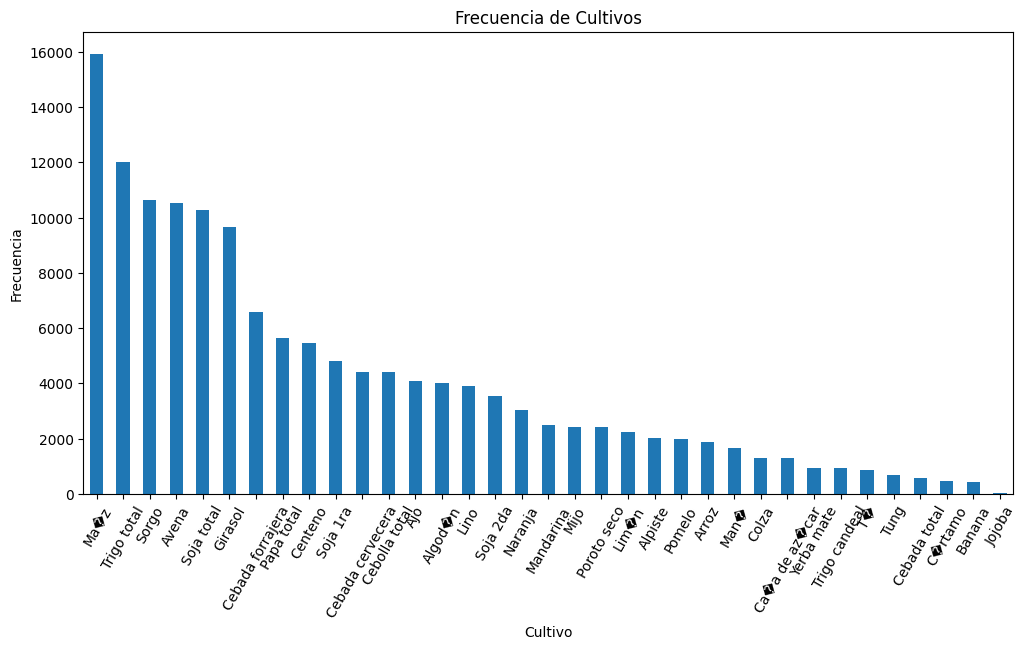

In [22]:
# Contar la frecuencia de cada cultivo
conteo_cultivos = df_agricola['cultivo'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
conteo_cultivos.plot(kind='bar')
plt.xlabel('Cultivo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cultivos')
plt.xticks(rotation=60)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

## Agrupamos por columna cultivos y se crea un gráfico de barras que muestra el recuento de producciones para cada cultivo.

<Axes: xlabel='cultivo'>

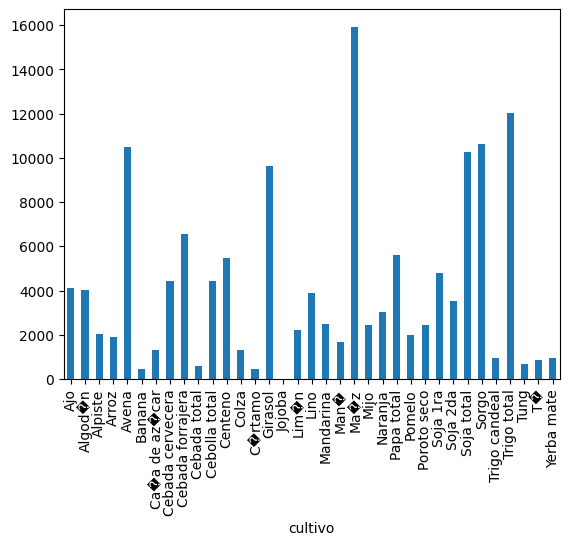

In [23]:
df_agricola.groupby('cultivo').count()['produccion'].plot(kind='bar')

## Ahora buscamos el cultivo con mayor superficie sembrada:

<Axes: ylabel='cultivo'>

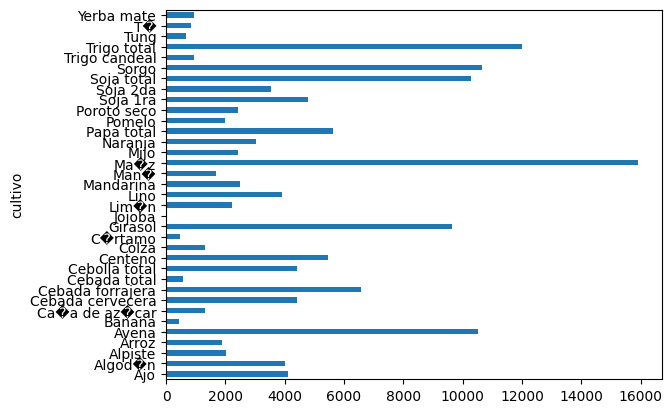

In [24]:
df_agricola.groupby('cultivo').count()['sup_sembrada'].plot(kind='barh')

## Análisis de Tendencias Agrícolas: Realiza un análisis exploratorio de datos para identificar tendencias en la producción agrícola a lo largo de diferentes años y Provincias.

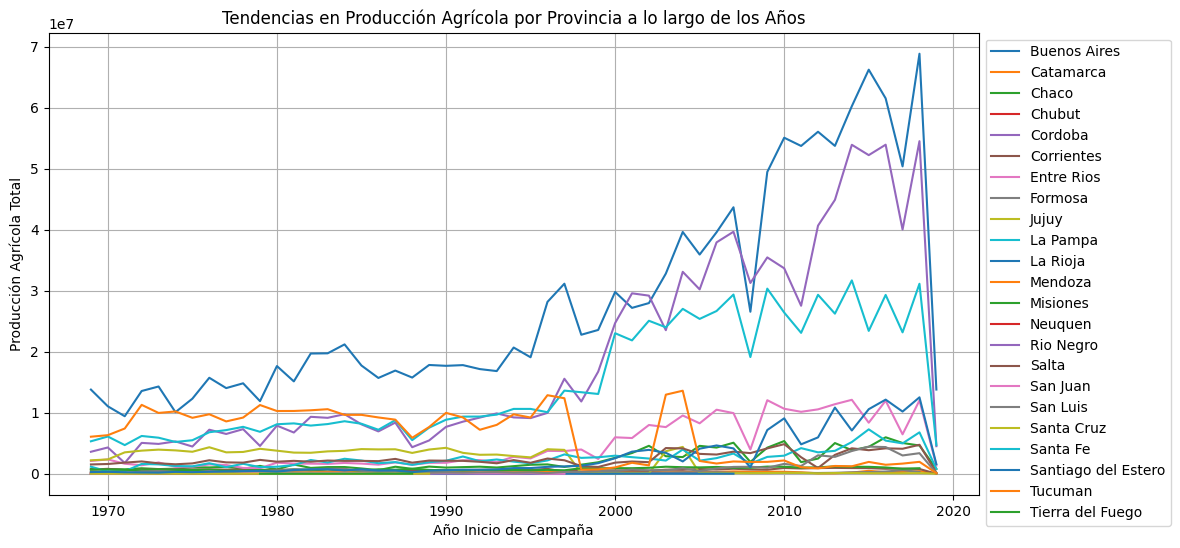

In [25]:
# Filtrar filas con años válidos y eliminar las que no cumplen el formato
df_agricola = df_agricola[df_agricola['inicio_campania'].notnull()]

# Calcular la producción total por año y Provincia
tendencias = df_agricola.groupby(['inicio_campania', 'provincia'])['produccion'].sum().reset_index()

# Visualizar tendencias a lo largo de los años
plt.figure(figsize=(12, 6))
for provincia in tendencias['provincia'].unique():
    data = tendencias[tendencias['provincia'] == provincia]
    plt.plot(data['inicio_campania'], data['produccion'], label=provincia)

plt.xlabel('Año Inicio de Campaña')
plt.ylabel('Producción Agrícola Total')
plt.title('Tendencias en Producción Agrícola por Provincia a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Se realiza un análisis de producción agrícola por Provincia y se visualizan aquellos con la mayor producción.

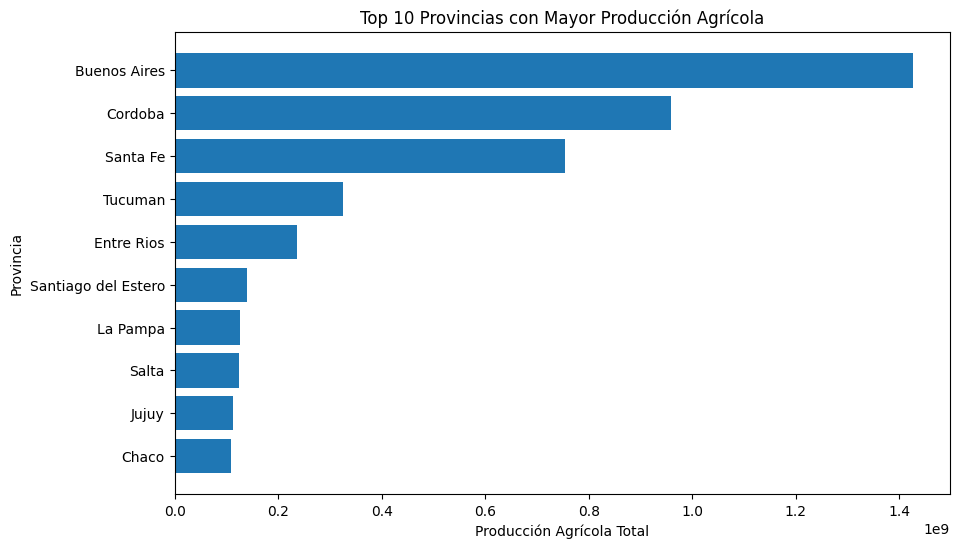

In [26]:
# Agrupa los datos por Provincia y calcula la producción agrícola total para cada una
produccion_por_provincia = df_agricola.groupby('provincia')['produccion'].sum().reset_index()

# Ordena las Provincias por producción agrícola de mayor a menor
produccion_por_provincia = produccion_por_provincia.sort_values(by='produccion', ascending=False)

# Visualiza las Provincias con la mayor producción agrícola (por ejemplo, las 10 principales)
top_n_provincias = 10
plt.figure(figsize=(10, 6))
plt.barh(produccion_por_provincia['provincia'].head(top_n_provincias), produccion_por_provincia['produccion'].head(top_n_provincias))
plt.xlabel('Producción Agrícola Total')
plt.ylabel('Provincia')
plt.title(f'Top {top_n_provincias} Provincias con Mayor Producción Agrícola')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar la que tiene la mayor producción en la parte superior
plt.show()

## Se realiza un análisis de producción agrícola por Departamento y se visualizan aquellos con la mayor producción.

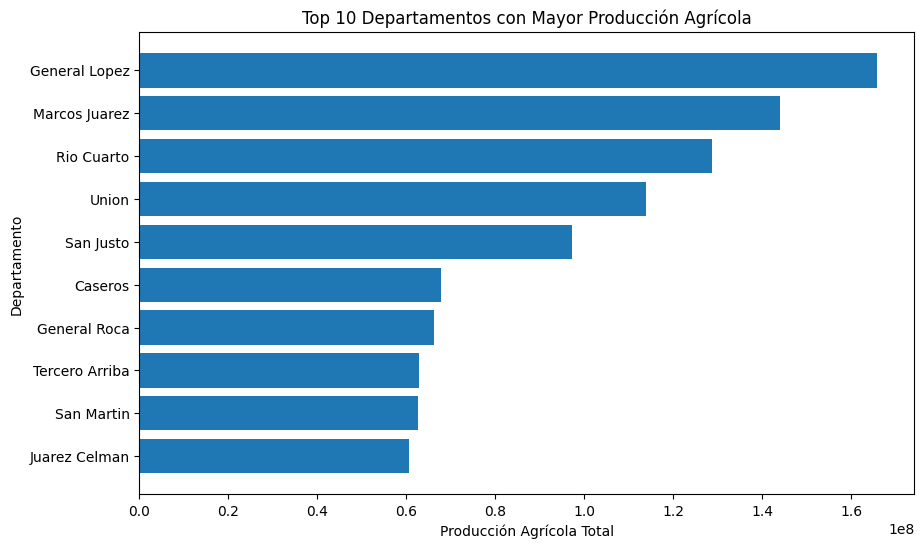

In [27]:
# Agrupa los datos por departamento y calcula la producción agrícola total para cada Departamento
produccion_por_departamento = df_agricola.groupby('departamento')['produccion'].sum().reset_index()

# Ordena los Departamentos por producción agrícola de mayor a menor
produccion_por_departamento = produccion_por_departamento.sort_values(by='produccion', ascending=False)

# Visualiza los Departamentos con la mayor producción agrícola (por ejemplo, las 10 principales)
top_n_departamentos = 10
plt.figure(figsize=(10, 6))
plt.barh(produccion_por_departamento['departamento'].head(top_n_departamentos), produccion_por_departamento['produccion'].head(top_n_departamentos))
plt.xlabel('Producción Agrícola Total')
plt.ylabel('Departamento')
plt.title(f'Top {top_n_departamentos} Departamentos con Mayor Producción Agrícola')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar el departamento con la mayor producción en la parte superior
plt.show()

## Examinar la variación de rendimiento de cultivos, en las diferentes Provincias seleccionadas (en este caso se seleccionaron Buenos Aires, Córdoba y Santa Fe), a lo largo de los años e identificar aquellos con un rendimiento constante o fluctuante:

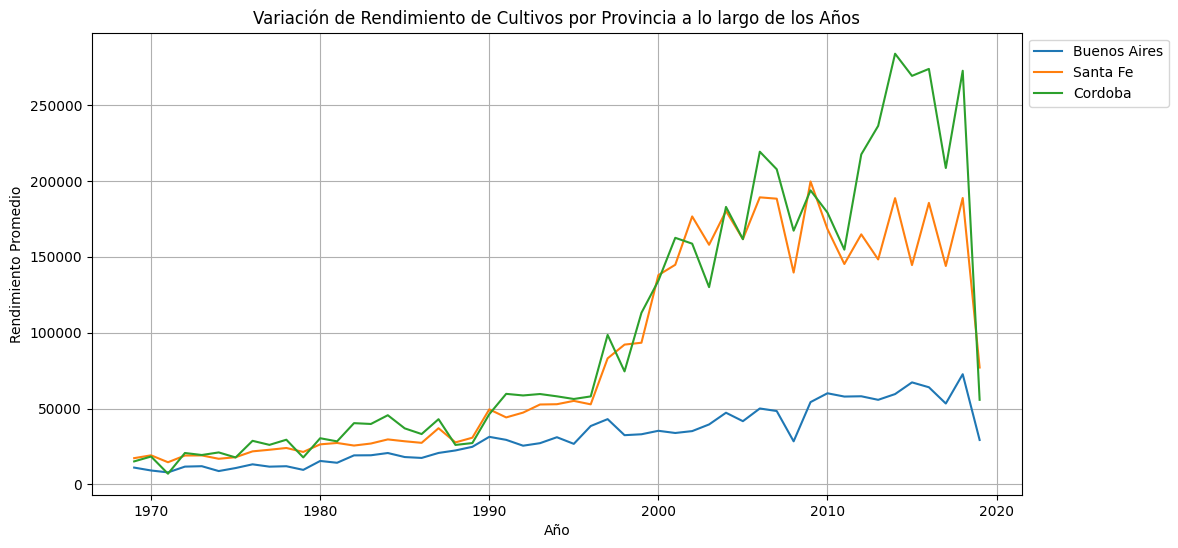

In [28]:
# Agrupa los datos por Provincia y año y calcula el rendimiento promedio
rendimiento_por_provincia = df_agricola.groupby(['provincia', 'inicio_campania'])['produccion'].mean().reset_index()

# Visualiza la variación de rendimiento para algunos Provincia seleccionadas
provincia_seleccionadas = ['Buenos Aires', 'Santa Fe', 'Cordoba']  # Provincias que se quieren analizar
plt.figure(figsize=(12, 6))

for provincia in provincia_seleccionadas:
    data_provincia = rendimiento_por_provincia[rendimiento_por_provincia['provincia'] == provincia]
    plt.plot(data_provincia['inicio_campania'], data_provincia['produccion'], label=provincia)

plt.xlabel('Año')
plt.ylabel('Rendimiento Promedio')
plt.title('Variación de Rendimiento de Cultivos por Provincia a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Examinar la variación de rendimiento de cultivos en diferentes Departamentos a lo largo de los años e identificar aquellos con un rendimiento constante o fluctuante (en éste caso se eligieron los tres con mayor produccion agricola):

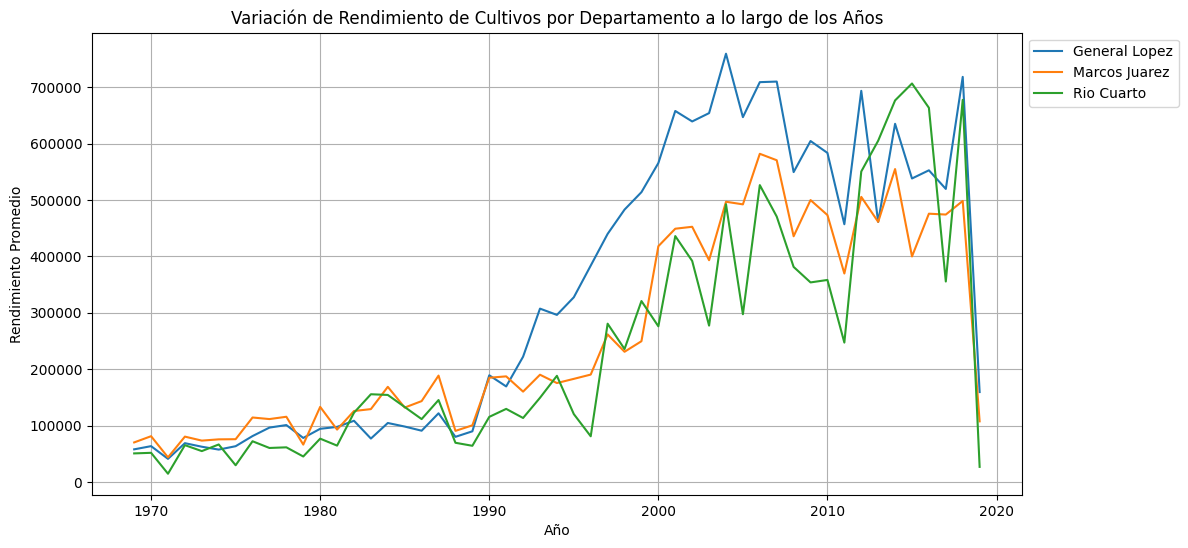

In [29]:
# Agrupa los datos por departamento y año y calcula el rendimiento promedio
rendimiento_por_departamento = df_agricola.groupby(['departamento', 'inicio_campania'])['produccion'].mean().reset_index()

# Visualiza la variación de rendimiento para algunos Departamentos seleccionadas
departamentos_seleccionados = ['General Lopez','Marcos Juarez', 'Rio Cuarto']  # departamentos que se quieren analizar
plt.figure(figsize=(12, 6))

for departamento in departamentos_seleccionados:
    data_departamento = rendimiento_por_departamento[rendimiento_por_departamento['departamento'] == departamento]
    plt.plot(data_departamento['inicio_campania'], data_departamento['produccion'], label=departamento)

plt.xlabel('Año')
plt.ylabel('Rendimiento Promedio')
plt.title('Variación de Rendimiento de Cultivos por Departamento a lo largo de los Años')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Creamos un mapa de calor para visualizar los datos

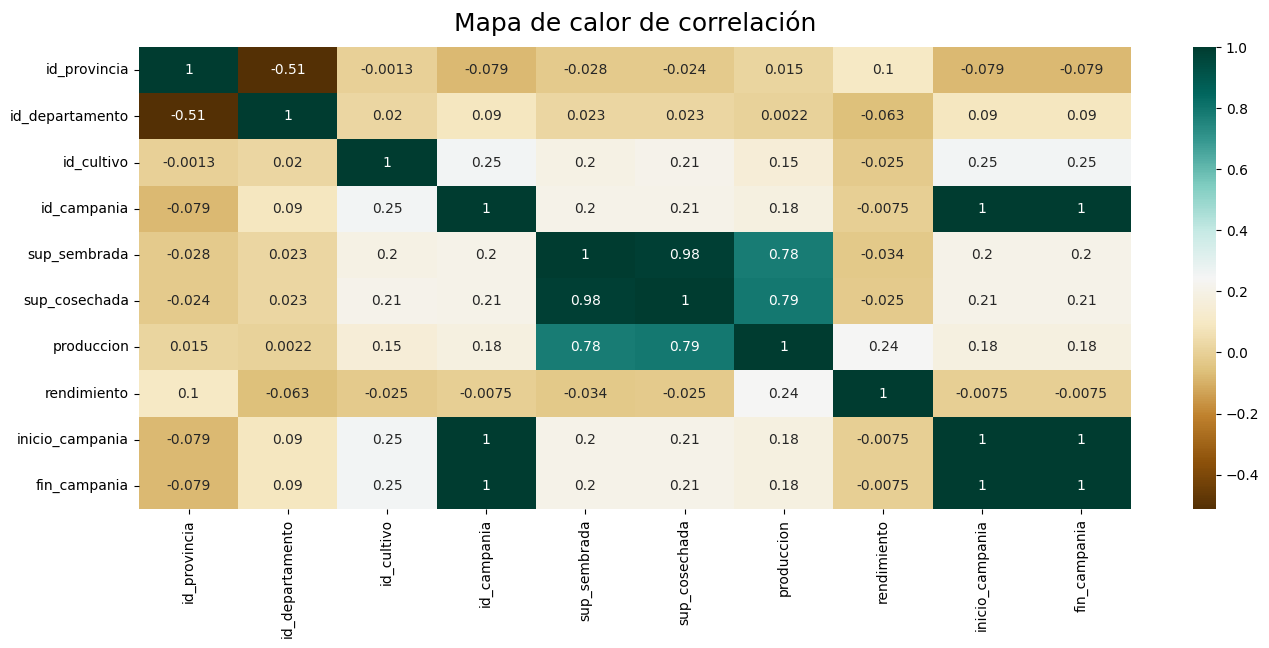

In [30]:
# Excluir columnas no numéricas
numeric_df_agricola = df_agricola.select_dtypes(include=[np.number])

# Crear el mapa de calor de correlación
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_df_agricola.corr(), annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlación', fontdict={'fontsize': 18}, pad=12)
plt.show()


## Queremos saber cual es el principal cultivo de cada Provincia

### Agrupar por provincia y cultivo los datos, y calcular la suma de la producción para cada combinación provincia-cultivo. Esto dará la producción total de cada cultivo en cada provincia

In [31]:

produccion_por_provincia_cultivo = df_agricola.groupby(['provincia', 'cultivo'])['produccion'].sum().reset_index()


### Identificar el cultivo principal dentro de cada provincia, buscamos el cultivo con la producción máximamediante la función idxmax() de pandas (dará el índice de la fila con la producción máxima)

In [32]:
cultivo_principal_por_provincia = produccion_por_provincia_cultivo.loc[produccion_por_provincia_cultivo.groupby('provincia')['produccion'].idxmax()]


### Mostramos los resultados en una tabla:

In [33]:

# Crea tabla con el cultivo principal y su producción por provincia
tabla_cultivo_principal = cultivo_principal_por_provincia[['provincia', 'cultivo', 'produccion']]

# Imprimir la tabla
print(tabla_cultivo_principal)


               provincia         cultivo  produccion
26          Buenos Aires     Trigo total   339126199
44             Catamarca      Soja total     2254369
69                 Chaco      Soja total    24300781
80                Chubut      Papa total      187410
108              Cordoba      Soja total   297295928
113           Corrientes           Arroz    16092480
160           Entre Rios      Soja total    60458538
167              Formosa          Banana     3264424
189                Jujuy  Ca�a de az�car   108236870
229             La Pampa     Trigo total    30854515
234             La Rioja   Cebolla total       24908
253              Mendoza      Papa total     2622639
279             Misiones      Yerba mate    17990972
286              Neuquen      Papa total       48415
296            Rio Negro      Papa total      213304
305                Salta  Ca�a de az�car    44107160
328             San Juan   Cebolla total     2298791
345             San Luis            Ma�z    22

## Grafico de dispersión para observar la relación entre "sup_sembrada" y "produccion":

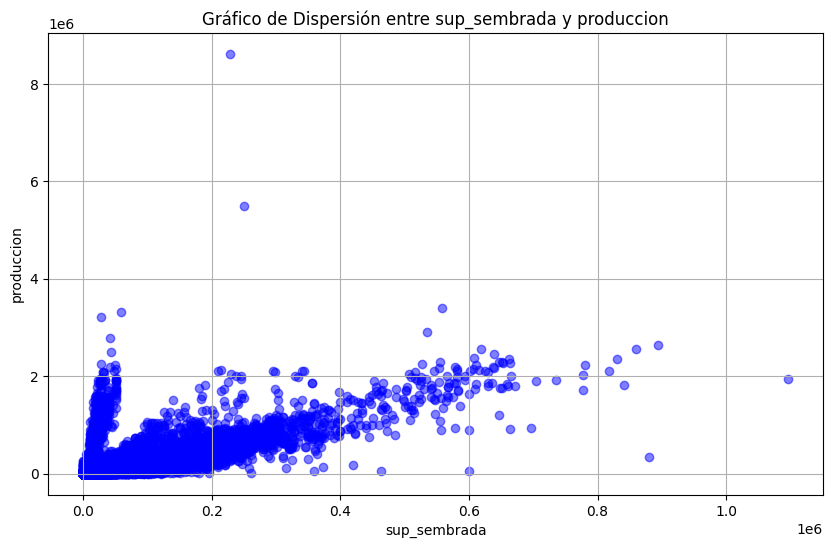

In [34]:


# Elegir las dos columnas numéricas que deseas comparar
columna_x = 'sup_sembrada'
columna_y = 'produccion'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_agricola[columna_x], df_agricola[columna_y], alpha=0.5, color='blue')
plt.title(f'Gráfico de Dispersión entre {columna_x} y {columna_y}')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.grid(True)
plt.show()


## Grafico de dispersión para observar la relación entre "sup_sembrada" y "rendimiento":

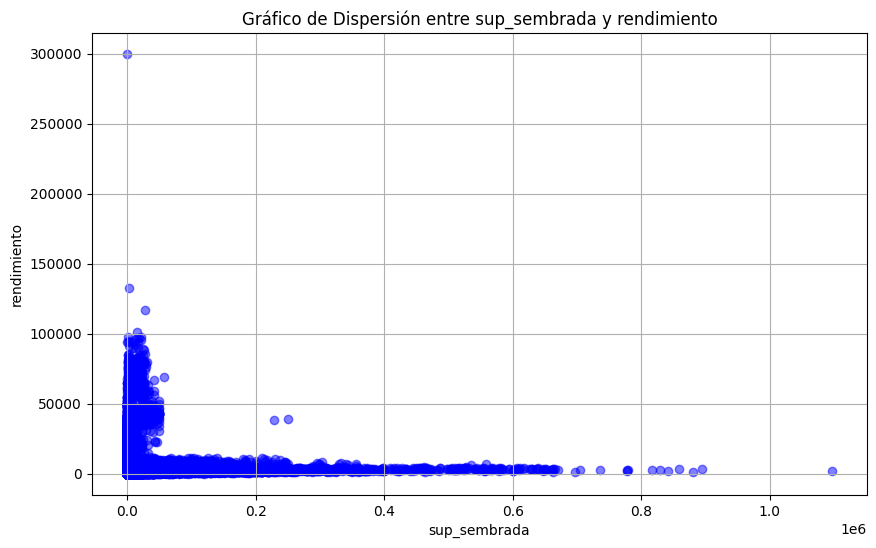

In [36]:


# Elegir las dos columnas numéricas que deseas comparar
columna_x = 'sup_sembrada'
columna_y = 'rendimiento'

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_agricola[columna_x], df_agricola[columna_y], alpha=0.5, color='blue')
plt.title(f'Gráfico de Dispersión entre {columna_x} y {columna_y}')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.grid(True)
plt.show()


##  Realiza una regresión lineal simple utilizando los datos de las columnas 'sup_cosechada' y 'produccion' del DataFrame df_agricola. El propósito principal de este código es estimar una relación lineal entre estas dos variables y visualizar los resultados.

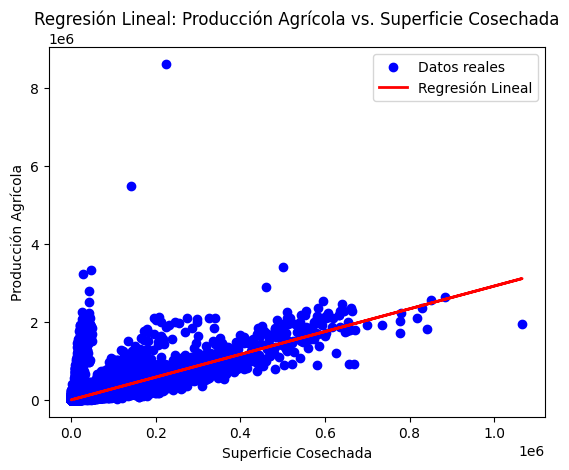

Coeficiente de la pendiente: 2.919197363036532
Intercepto: 1533.7875362112027


In [35]:
# Seleccionar la variable independiente (sup_cosechada) y la variable dependiente (produccion)
X = df_agricola['sup_cosechada'].values.reshape(-1, 1)
y = df_agricola['produccion'].values

# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo a los datos
modelo_regresion.fit(X, y)

# Hacer predicciones
y_pred = modelo_regresion.predict(X)

# Visualizar los resultados
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Superficie Cosechada')
plt.ylabel('Producción Agrícola')
plt.title('Regresión Lineal: Producción Agrícola vs. Superficie Cosechada')
plt.legend()
plt.show()

# Imprimir los coeficientes de la regresión
print("Coeficiente de la pendiente:", modelo_regresion.coef_[0])
print("Intercepto:", modelo_regresion.intercept_)